       product  total_qty   revenue
0      Charger        544   10880.0
1   Headphones        570   28500.0
2     Keyboard        481   14430.0
3       Laptop        495  396000.0
4      Monitor        543  108600.0
5        Mouse        613   15325.0
6   Smartphone        546  273000.0
7       Tablet        566  169800.0
8  USB-C Cable        516    5160.0
9       Webcam        625   43750.0


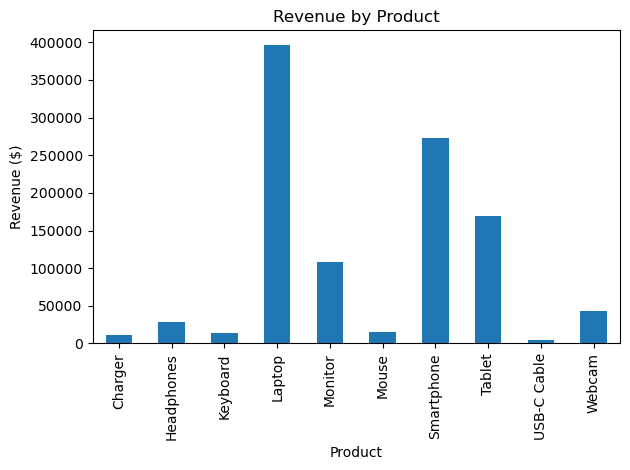

In [1]:
import sqlite3
import random
import pandas as pd
import matplotlib.pyplot as plt

# Connect to (or create) the SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Define sample products and their price ranges
products = {
    'Laptop': 800.00,
    'Smartphone': 500.00,
    'Headphones': 50.00,
    'Keyboard': 30.00,
    'Mouse': 25.00,
    'Monitor': 200.00,
    'USB-C Cable': 10.00,
    'Webcam': 70.00,
    'Charger': 20.00,
    'Tablet': 300.00
}

# Generate 1000+ random sales records
sales_data = []
for _ in range(1000):
    product = random.choice(list(products.keys()))
    price = products[product]
    quantity = random.randint(1, 10)  # Quantity between 1 and 10
    sales_data.append((product, quantity, price))

# Insert the data into the table
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)
conn.commit()

# Run the SQL query to get total quantity and revenue per product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

# Load results into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Print the DataFrame
print(df)

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig('sales_chart.png')
plt.show()
